# Homework 10: Regression Inference

**Reading**: Textbook chapter [16](https://umass-data-science.github.io/190fwebsite/textbook/16/inference-for-regression/).

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Homework 10 is due **Wednesday, 12/5 at 11:59pm**. Start early so that you can come to office hours if you're stuck. Check the website for the office hours schedule. Late work will not be accepted as per the [policies](https://umass-data-science.github.io/190fwebsite/policies/) of this course. 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [1]:
# Don't change this cell; just run it. 
! pip install -U okpy

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

from client.api.notebook import Notebook
ok = Notebook('hw10.ok')
_ = ok.auth(inline=True)

Requirement already up-to-date: okpy in /Users/tbernard/anaconda3/lib/python3.8/site-packages (1.18.1)
Assignment: Homework 10: Regression Inference
OK, version v1.18.1



FileNotFoundError: [Errno 2] No such file or directory: '/Users/tbernard/.config/ok/auth_refresh'

## 1. Visual Diagnostics for Linear Regression


### Regression Model Diagnostics
Linear regression isn't always the best way to describe the relationship between two variables. We'd like to develop techniques that will help us decide whether or not to use a linear model to predict one variable based on another.

We will use the insight that if a regression fits a set of points well, then the residuals from that regression line will show no pattern when plotted against the predictor variable. 

The table below contains information about crime rates and median home values in suburbs of Boston. We will attempt to use linear regression to predict median home value in terms of crime rate.

#### About the dataset
All data are from 1970.  Crime rates are per capita per year; home values are in thousands of dollars.  The crime data come from the FBI, and home values are from the US Census Bureau.  

Run the next cell to load the data and see a scatter plot.

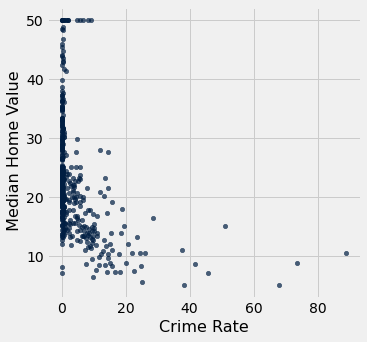

In [2]:
boston = Table.read_table('boston_housing.csv')
boston.scatter('Crime Rate')

<div class="hide">\pagebreak</div>

#### Question 1
Write a function called `residuals`.  It should take a single argument, a table.  It should first compute the slope and intercept of the regression line that predicts the second column of that table (accessible as `tbl.column(1)`) using the first column (`tbl.column(0)`).  `residuals` should return an array containing the *residuals* for that regression line. Recall that residuals are given by 

$$residual = observed \ value - regression \ estimate$$

Hint: If your code is getting long, think about how you can split the problem up into multiple smaller, simpler functions.

In [3]:
def residuals(tbl):
    def standard_units(number):
        return (number - np.mean(number))/np.std(number)
    sd_x = np.std(tbl.column(0))
    sd_y = np.std(tbl.column(1))
    av_x = np.mean(tbl.column(0))
    av_y = np.mean(tbl.column(1))
    r = np.mean(standard_units(tbl.column(0)) * standard_units(tbl.column(1)))
    slope = r * (sd_y / sd_x)
    intercept = av_y - slope * av_x
    return tbl.column(1) - (slope * tbl.column(0) + intercept)

In [3]:
_ = ok.grade('q1_1')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Question 1_1 > Suite 1 > Case 1

>>> 36000 <= sum(residuals(boston)**2) <= 37000
NameError: name 'boston' is not defined

# Error: expected
#     True
# but got
#     Traceback (most recent call last):
#       ...
#     NameError: name 'boston' is not defined

Run only this test case with "python3 ok -q q1_1 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw10.ipynb'.
Performing authentication
Please enter your school email (.edu): 


KeyboardInterrupt: 

<div class="hide">\pagebreak</div>

#### Question 2
Make a scatter plot of the residuals for the Boston housing dataset against crime rate. Crime rate should be on the horizontal axis.

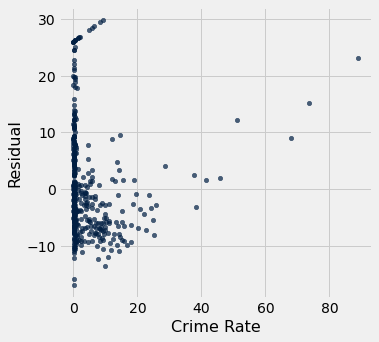

In [4]:
Table().with_columns("Crime Rate", boston[0], "Residual", residuals(boston)).scatter(0, 1)

<div class="hide">\pagebreak</div>

#### Question 3
Does the plot of residuals look roughly like a formless cloud? Or is there some kind of pattern in them? Are they centered around 0?

No. It's not a formless cloud. No, it is not centered around 0. 

<div class="hide">\pagebreak</div>

#### Question 4
Does it seem like a linear model is appropriate for describing the relationship between crime and median home value? Explain your reasoning.

No. Check 15.5. 

Section [15.6](https://umass-data-science.github.io/190fwebsite/textbook/15/6/numerical-diagnostics/) of the textbook describes some mathematical facts that hold for all regression estimates, regardless of goodness of fit.  One fact is that there is a relationship between the standard deviation of the residuals, the standard deviation of the response variable, and the correlation.  Let us test this.

<div class="hide">\pagebreak</div>

#### Question 5
Directly compute the standard deviation of the residuals from the Boston data.  Then compute the same quantity without using the residuals, using the formula described in section [15.6](https://umass-data-science.github.io/190fwebsite/textbook/15/6/numerical-diagnostics/) instead.

In [5]:
boston_residual = Table().with_columns("Crime Rate", boston[0], "Residual", residuals(boston))
boston_residual_sd = np.std(boston_residual["Residual"])

def standard_units(x):
        return (x - np.mean(x)) / np.std(x)  
    
def correlation(t, x, y):
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

boston_residual_sd_from_formula = np.sqrt(1 - correlation(boston, "Crime Rate", " Median Home Value") ** 2) * np.std(boston[" Median Home Value"])

print("Residual SD: {0}".format(boston_residual_sd))
print("Residual SD from the formula: {0}".format(boston_residual_sd_from_formula))

Residual SD: 8.474144781120948
Residual SD from the formula: 8.474144781120948


In [ ]:
_ = ok.grade('q1_5')
_ = ok.backup()

Below, we have imported a new table, the Old Faithful data.

In [ ]:
old_faithful = Table.read_table('faithful.csv')
old_faithful

The following cell makes a residual plot for this new dataset.

In [ ]:
Table().with_columns('Residual', residuals(old_faithful), 'Duration', old_faithful.column('duration')).scatter('Duration')

<div class="hide">\pagebreak</div>
#### Question 6
Repeat the procedure from Question 5 to find the standard deviation of the residuals for the `old_faithful` dataset.

In [ ]:
def standard_units(number):
        return (number - np.mean(number))/np.std(number)

r = np.mean(standard_units(old_faithful.column(0)) * standard_units(old_faithful.column(1)))

faithful_residual_sd = np.std(residuals(old_faithful))
faithful_residual_sd_from_formula = np.sqrt(1 - r ** 2) * np.std(old_faithful[1])

print("Residual SD: {0}".format(faithful_residual_sd))
print("Residual SD from the formula: {0}".format(faithful_residual_sd_from_formula))

In [ ]:
_ = ok.grade('q1_6')
_ = ok.backup()

## 2. Quantifying Sampling Errors in Regression


Previously, in this class we've used confidence intervals to quantify uncertainty about estimates as well as to test predictions. To run a hypothesis test using a confidence interval, we use the following procedure:
1. Formulate a null hypothesis
2. Formulate an alternative hypothesis 
3. Choose a test statistic and compute the observed value for the test statistic
4. Bootstrap, finding a value of the test stat for each resample
5. Generate a 95% confidence interval from those resampled test stats
6. Based on whether your value is in an interval, make a conclusion

Another thing we've covered recently is the use of linear regression to make predictions, using correlated variables. An example is, say, predicting the height of children based on the heights of their parents.

We can combine these two topics together in order to make even more powerful statements about our population given just a sample as before. We can use the following techniques to do so:
- Bootstrapped interval for the true slope
- Bootstrapped prediction interval for y (given a particular value of x)

This homework further explores these two advanced methods.

Recall the Old Faithful dataset from our lab on regression. The table contains two pieces of information about each eruption of the Old Faithful geyser in Yellowstone National Park:
1. The duration of the eruption, in minutes.
2. The time between this eruption and the next eruption (the "waiting time"), in minutes.

The dataset is plotted below along with its line of best fit.

duration,wait
3.6,79
1.8,54
3.333,74
2.283,62
4.533,85
2.883,55
4.7,88
3.6,85
1.95,51
4.35,85


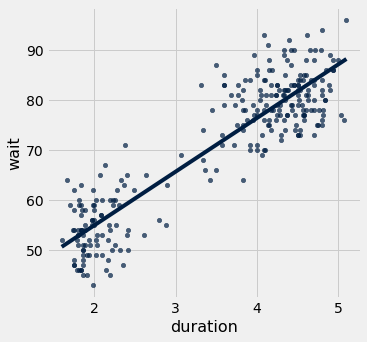

In [6]:
faithful = Table.read_table('faithful_inference.csv')
faithful.scatter('duration', fit_line=True)
faithful

### Finding the Bootstrap Confidence Interval for the True Slope

Last time we looked at this dataset, we noticed the apparent linear relationship between duration and wait, and we decided to use regression to predict wait in terms of duration. However, our data are just a sample of all the eruptions that have happened at Old Faithful. As we know, relationships can appear in a sample that don't really exist in the population from which the sample was taken.

#### Question 1

Before we move forward using our linear model, we would like to know whether or not there truly exists a relationship between duration and wait time. If there is no relationship between the two, then we'd expect a correlation of 0, which would give us a slope of 0. Now, write in null and alternative hypotheses, based on your knowledge of hypothesis tests you've conducted in the past.

- **Null Hypothesis:** The slope is 0
- **Alternate Hypothesis:** The slope is not 0

<div class="hide">\pagebreak</div>

#### Question 2
We will use the method of confidence intervals to test this hypothesis.

We'll warm up by implementing some familiar functions. You may use these functions throughout this assignment. Start by defining these two functions:

1. `standard_units` should take in an array of numbers and return an array containing those numbers converted to standard units.
2. `correlation` should take in a table with 2 columns and return the correlation between these columns. Hint: you may want to use the `standard_units` function you defined above.

In [7]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

def correlation(tbl):
    return np.mean(standard_units(tbl.column(0)) * standard_units(tbl.column(1)))

In [ ]:
_ = ok.grade('q2_2')
_ = ok.backup()

<div class="hide">\pagebreak</div>

#### Question 3
Using the functions you just implemented, create a function called `fit_line`.  It should take a table as its argument.  It should return an array containing the slope and intercept of the regression line that predicts the second column in the table using the first.

In [8]:
def fit_line(tbl):
    r = correlation(tbl)
    slope = r * np.std(tbl[1]) / np.std(tbl[0])
    intercept = np.mean(tbl[1]) - slope * np.mean(tbl[0])
    return make_array(slope, intercept)

# This should compute the slope and intercept of the regression
# line predicting wait time from duration in the faithful dataset.
fit_line(faithful)

array([10.7296414 , 33.47439702])

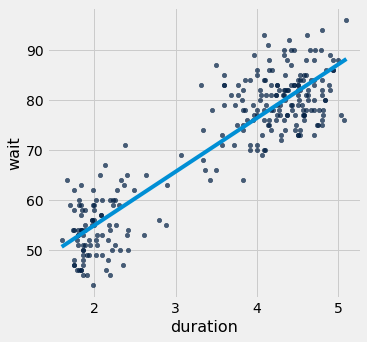

In [9]:
# Ensure your fit_line function fits a reasonable line 
# to the data in faithful, using the plot below

slope, intercept = fit_line(faithful)
faithful.scatter(0)
plt.plot([min(faithful[0]), max(faithful[0])], 
         [slope*min(faithful[0])+intercept, slope*max(faithful[0])+intercept])
plt.show()

In [ ]:
_ = ok.grade('q2_3')
_ = ok.backup()

Now we have all the tools we need in order to create a confidence interval quantifying our uncertainty about the true relationship between duration and wait time.

<div class="hide">\pagebreak</div>

#### Question 4
Use the bootstrap to compute 1000 resamples from our dataset. For each resample, compute the slope of the best fit line. Put these slopes in an array called `resample_slopes`, giving you the empirical distribution of regression line slopes in resamples. Plot a histogram of these slopes.

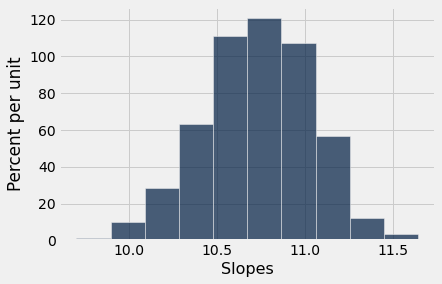

In [10]:
resample_slopes = []
for i in range(1000):
    resample = faithful.sample()
    slope, intercept = fit_line(resample)
    resample_slopes.append(slope)
resample_slopes = np.array(resample_slopes)
Table().with_column('Slopes', resample_slopes).hist()

<div class="hide">\pagebreak</div>

#### Question 5
Use your resampled slopes to construct an approximate 95% confidence interval for the true value of the slope.

In [11]:
lower_end = percentile(2.5, resample_slopes)
upper_end = percentile(97.5, resample_slopes)
print("95% confidence interval for slope: [{:g}, {:g}]".format(lower_end, upper_end))

95% confidence interval for slope: [10.1122, 11.2726]


<div class="hide">\pagebreak</div>

#### Question 6
Based on your confidence interval, would you accept or reject the null hypothesis that the true slope is 0?  Why?  What P-value cutoff are you using?

Reject. Confidence interval does not contain 0 slope. 0.05.

### Finding the Bootstrap Prediction Interval

Suppose we're tourists at Yellowstone, and we'd like to know how long we'll have to wait for the next Old Faithful eruption.  We decide to use our regression line to make some predictions for the waiting times.  But just as we're uncertain about the slope of the true regression line, we're also uncertain about the predictions we'd make based on the true regression line.

<div class="hide">\pagebreak</div>

#### Question 7
Define the function `fitted_value`.  It should take 2 arguments:

1. A table with 2 columns.  We'll be predicting the values in the second column using the first.
2. A number, the value of the predictor variable for which we'd like to make a prediction.

Make sure to use your `fit_line` function. 

In [12]:
def fitted_value(table, given_x):
    # The staff solution took 4 lines of code.
    slope, intercept = fit_line(table)
    return slope * given_x + intercept

# Here's an example of how fitted_value is used.  This should
# compute the prediction for the wait time of an eruption that lasts 
# two minutes .
two_minutes_wait = fitted_value(faithful, 2)
two_minutes_wait

54.933679813020404

In [ ]:
_ = ok.grade('q2_7')
_ = ok.backup()

<div class="hide">\pagebreak</div>
#### Question 8
The park ranger tells us that the most recent eruption lasted 5 minutes. Using your function above, assign the variable `five_minutes_wait` to the predicted wait time. 

In [13]:
five_minutes_wait = fitted_value(faithful, 5)
five_minutes_wait

87.12260399842098

In [ ]:
_ = ok.grade('q2_8')
_ = ok.backup()

Juan, a fellow tourist, raises the following objection to your prediction:

> "Your prediction depends on your sample of 272 eruptions.  Couldn't your prediction have been different if you had happened to have a different sample of eruptions?"

Having read [section 16.3](https://umass-data-science.github.io/190fwebsite/textbook/16/3/prediction-intervals/) of the textbook, you know just the response!

<div class="hide">\pagebreak</div>

#### Question 9
Define the function `bootstrap_lines`.  It should take two arguments:
1. A table with two columns.  As usual, we'll be predicting the second column using the first.
2. An integer, a number of bootstraps to run.

It should return a *table* whose first column, `"Slope"`, contains the given number of bootstrapped slopes, and whose second column, `"Intercept"`, contains the corresponding bootstrapped intercepts.  Each slope and intercept should come from a regression line that predicts column 2 from column 1 of a resample of the given table.  The table should have 1 row for each bootstrap replication.

In [14]:
def bootstrap_lines(tbl, num_bootstraps):
    resampled_slopes = []
    resampled_intercepts = []
    for i in np.arange(num_bootstraps):
        sample = tbl.sample()
        slope, intercept = fit_line(sample)
        resampled_slopes = np.append(resampled_slopes, slope)
        resampled_intercepts = np.append(resampled_intercepts, intercept)
    result_table = Table().with_columns("Slope", resampled_slopes, "Intercept", resampled_intercepts)
    return result_table

# When you're done, this code should produce the slopes
# and intercepts of 1000 regression lines computed from
# resamples of the faithful table.
regression_lines = bootstrap_lines(faithful, 1000)
regression_lines

Slope,Intercept
10.8227,33.1662
10.5414,34.3385
11.1717,31.6255
10.0418,35.9064
10.8033,32.9267
10.9807,32.9303
10.7996,33.582
10.6316,33.2917
10.8224,33.4151
11.122,31.8475


<div class="hide">\pagebreak</div>

#### Question 10
Create an array called `predictions_for_five`.  It should contain 1000 numbers.  Each number should be the predicted waiting time after an eruption with a duration of 5 minutes, using a different bootstrapped regression line. Hint: use `regression_lines` from the previous questions.

In [ ]:
predictions_for_five = regression_lines[0] * 5 + regression_lines[1]

# This will make a histogram of your predictions:
table_of_predictions = Table().with_column('Predictions at eruptions=5', predictions_for_five)
table_of_predictions.hist('Predictions at eruptions=5', bins=20)

<div class="hide">\pagebreak</div>

#### Question 11
Create a 95 percent confidence interval for these predictions.

In [ ]:
lower_bound = percentile(2.5, predictions_for_five)
upper_bound = percentile(97.5, predictions_for_five)

print('95% Confidence interval for predictions for x=5: (', lower_bound,",", upper_bound, ')')

<div class="hide">\pagebreak</div>

#### Question 12
Look at the scatter plot of the data at the start of this exercise. 
Determine which of the following are true, then set `question_12_choice` to your response. For example, if you think that 1 and 2 are true but 3 is false, you'd assign `question_12_choice` to be 4. 

Statement 1: This confidence covers 95 percent of waiting times of eruptions in `faithful` that had an eruption duration of 5 minutes.

Statement 2: This interval gives a sense of how much actual wait times differ from your prediction.

Statement 3: The confidence interval quantifies our uncertainty in our estimate of what the true regression line would predict.

1) T, T, T

2) F, T, T

3) T, F, T

4) T, T, F

5) F, F, T

6) T, F, F

7) F, T, F

8) F, F, F

In [ ]:
question_12_choice = 2

In [ ]:
_ = ok.grade('q2_12')
_ = ok.backup()

## 4. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading!

In [ ]:
_ = ok.submit()